In [1]:
# We will be looking at data from stock market.
# We will be answer the following question along the way

# 1. What was the change in price of the stock over time?
# 2. What was the daily return of the stock on average?
# 3. What was the moving average of the various stocks?
# 4. What was the correlation between different stocks?
# 5. How much value do we put at risk by investing in a particular stock?
# 6. How can we attempt to predict future stock behavior?


In [1]:
# What was the change in price of stock over time?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# for time stamps

from datetime import datetime

In [4]:
# The tech stocks we will use for this analysis 

tech_list=['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Setup end and start times for data grad
end=datetime.now()
start=datetime(end.year-1,end.month, end.day)

# for loop for grabing yahoo finance data and seting as a dataframe

for stock in tech_list:
    # set DataFramme as Stock Ticker
    globals()[stock]=DataReader(stock,'yahoo', start, end)
    
#Using globals() is a sloppy way of setting the DataFrame names, but its simple


In [5]:
company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=["APPLE","GOOGLE","MICROSOFT","AMAZON"]
for company, com_name in zip(company_list,company_name):
    company["company_name"]=com_name
df=pd.concat(company_list,axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300.0,3177.290039,AMAZON
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800.0,3104.199951,AMAZON
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200.0,3101.489990,AMAZON
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3064700.0,3116.419922,AMAZON
2020-12-14,3190.469971,3126.000000,3143.000000,3156.969971,4155800.0,3156.969971,AMAZON
2020-12-15,3188.500000,3130.489990,3181.010010,3165.120117,3323700.0,3165.120117,AMAZON
2020-12-16,3247.000000,3163.679932,3176.010010,3240.959961,4427600.0,3240.959961,AMAZON
2020-12-17,3263.510010,3221.000000,3250.000000,3236.080078,3474300.0,3236.080078,AMAZON
2020-12-18,3249.419922,3171.600098,3243.989990,3201.649902,5995700.0,3201.649902,AMAZON


In [6]:
# sumary Stats
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,95.012431,92.314087,93.635189,93.743323,1.554069e+08,93.424122
std,21.438762,20.893947,21.342067,21.157087,7.141012e+07,21.298374
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,76.246878,74.968748,75.663126,75.900623,1.088613e+08,75.401398
50%,90.896252,88.037498,89.403748,89.866249,1.379199e+08,89.550014
75%,116.575003,113.612501,115.242502,115.102501,1.859723e+08,114.941700
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [7]:
# general infor
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-23 to 2020-12-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


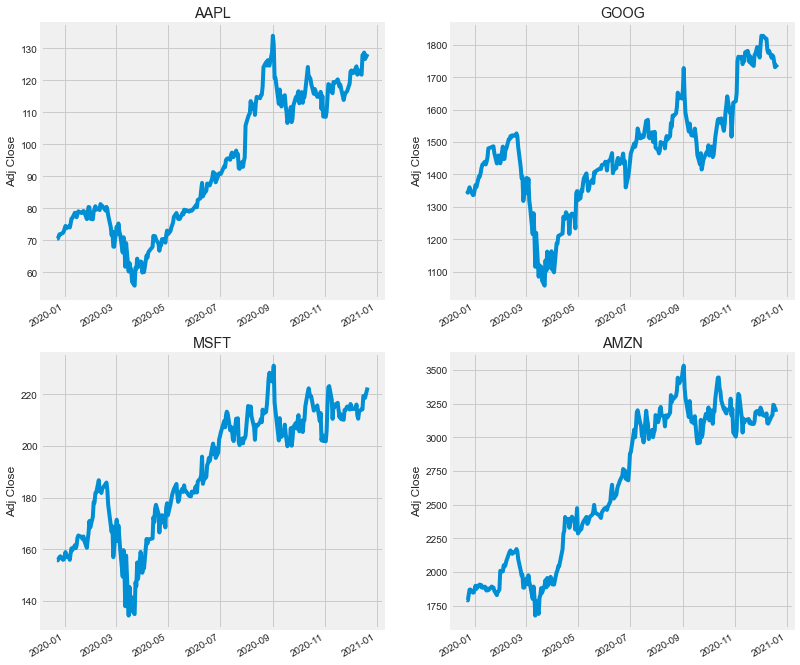

In [8]:
# let see historical view of the closing price



plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [26]:
#Now that we've seen the visualizations for the closing price and the volume traded each day, 
# let's go ahead and caculate the moving average for the stock.


In [9]:
# What was the moving average of the various stocks?
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [30]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


In [31]:
# go ahead to plot average the additional Moving Average

company_name
AMAZON       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
APPLE        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOGLE       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MICROSOFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

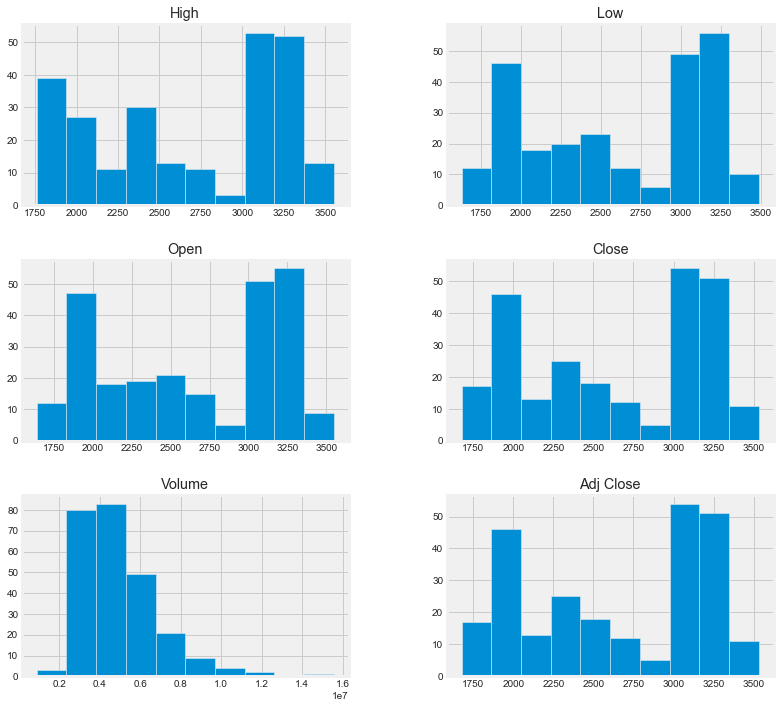

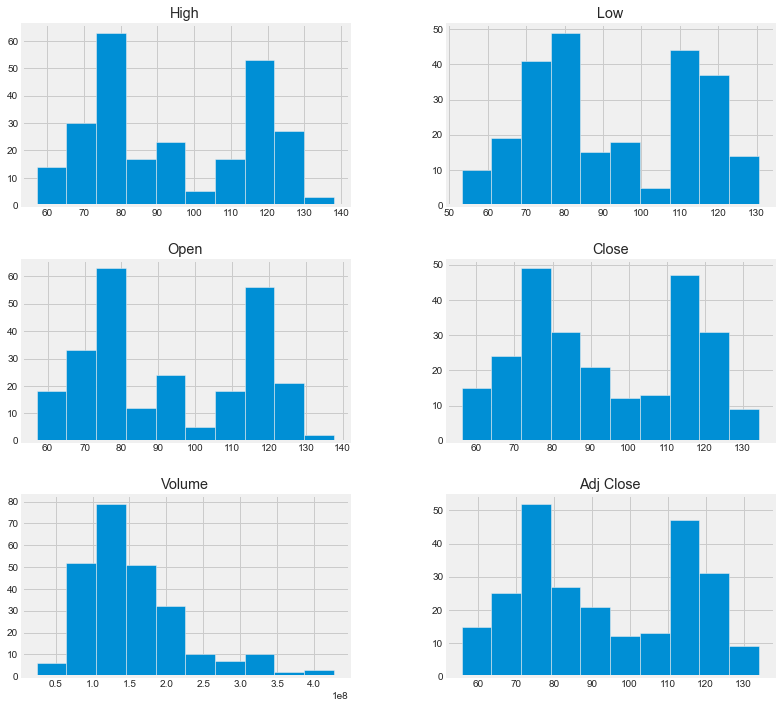

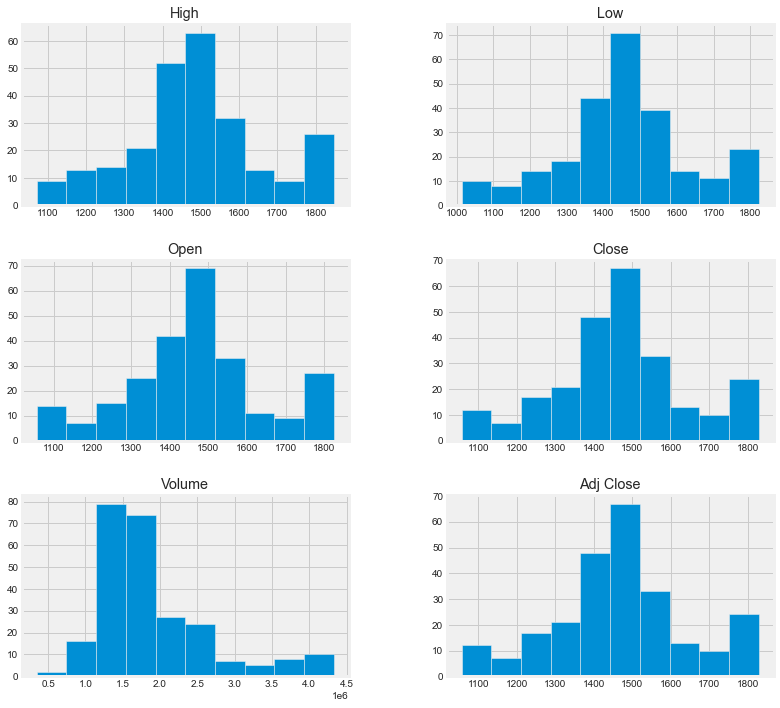

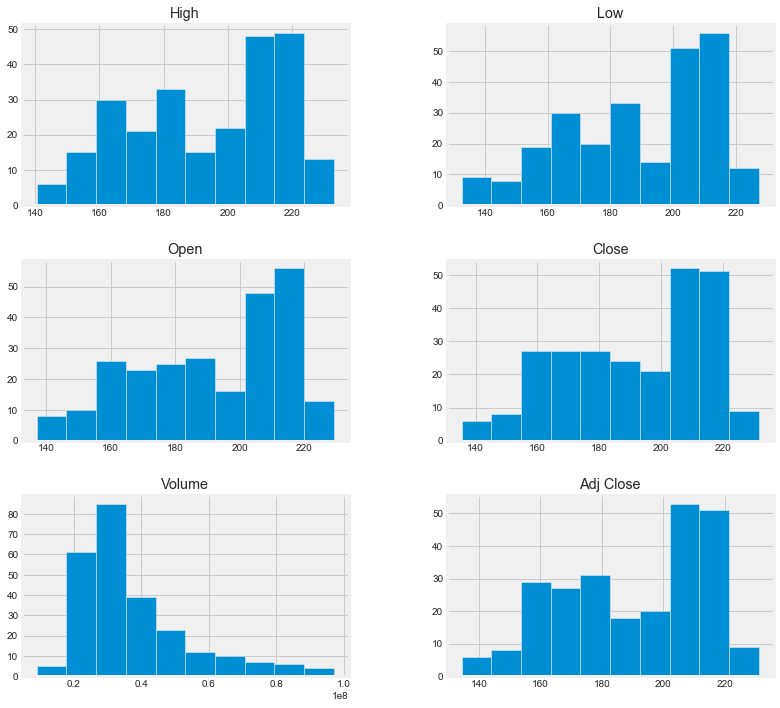

In [10]:
df.groupby("company_name").hist(figsize=(12,12))

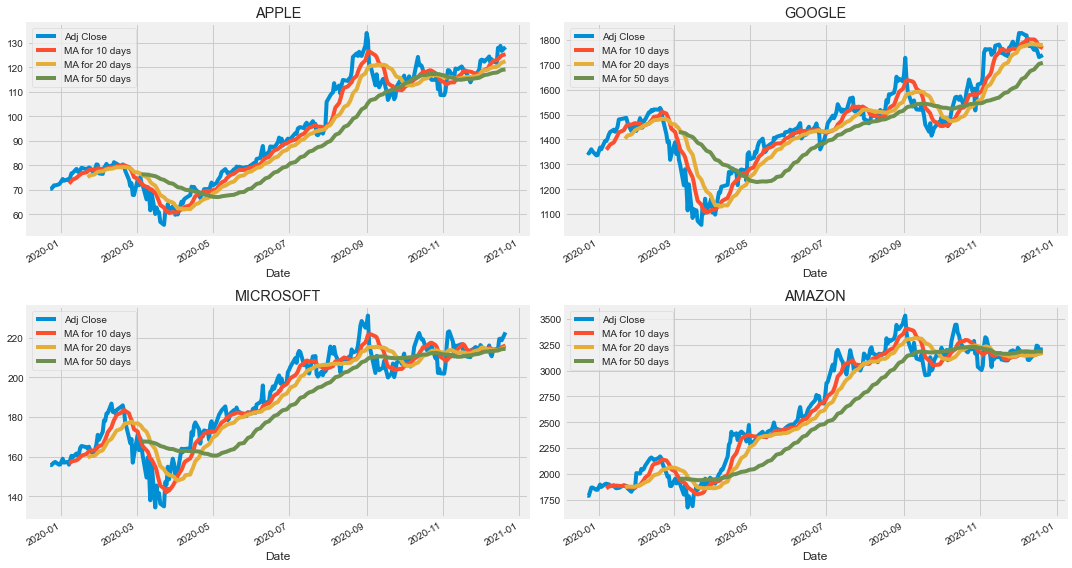

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

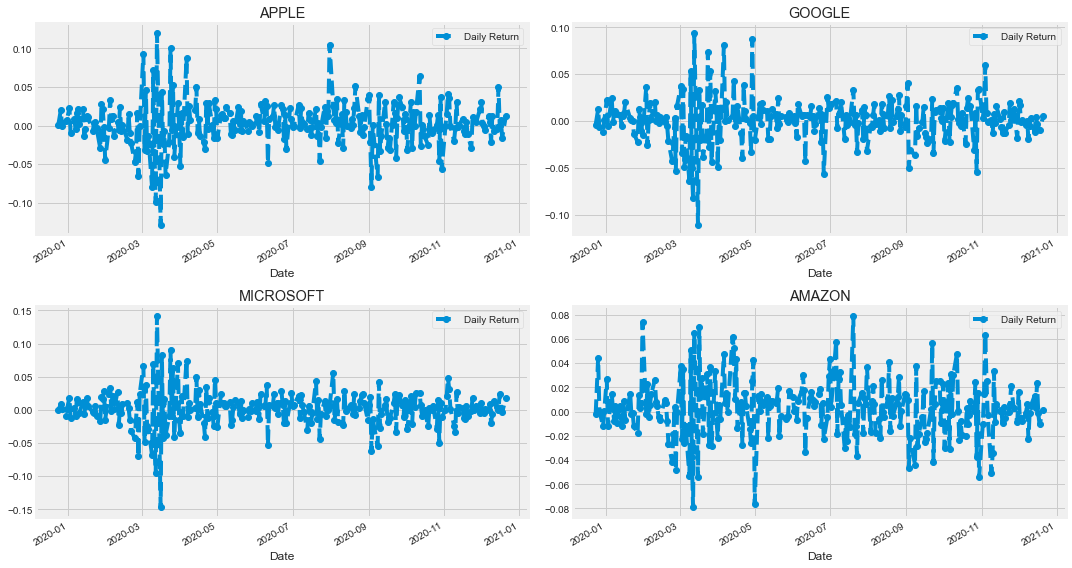

In [14]:
# What was the daily return of the stock on average
# we will use pct_change to find the percentage change for each day

for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()
# then we'll plot the daily return percentage

fig,axes =plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

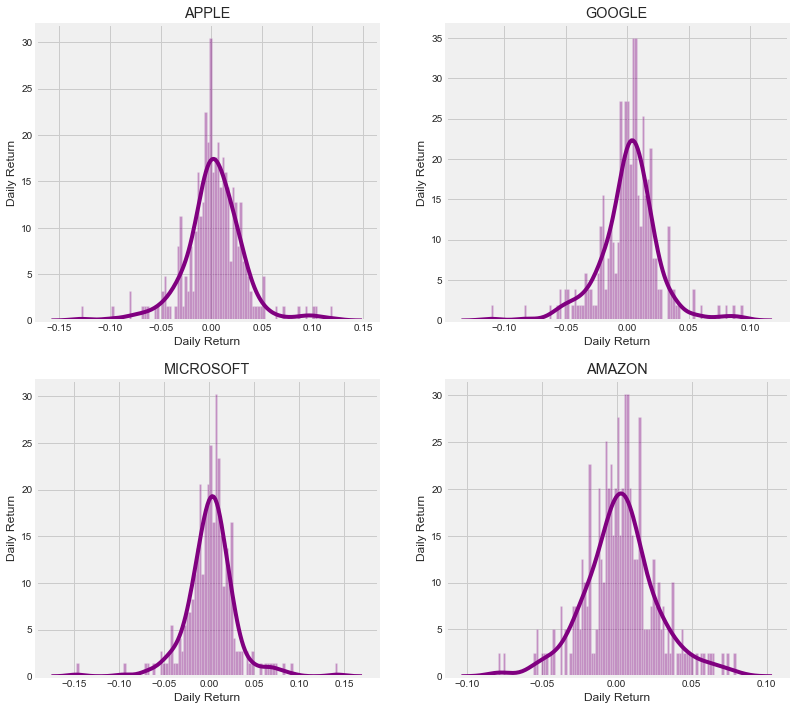

In [15]:
# We'll use seanborn to create a histogram and kde plot on the same figure
# Note" Seanbon can't read NaN value, therefore we will use dropna() to remove nan value

plt.figure(figsize=(12,12))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    sns.distplot(company['Daily Return'].dropna(), bins=100,color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')

In [48]:
# 4. WHat was the correlation between different stocks closing prices?
# what if we wanted to analyze the return of all the stocks in our list



In [16]:
# grap all the closing prices for the tech stock list in to one DataFrame
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
# let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-23,70.392090,1348.839966,155.759949,1793.000000
2019-12-24,70.459007,1343.560059,155.730255,1789.209961
2019-12-26,71.856941,1360.400024,157.006729,1868.770020
2019-12-27,71.829674,1351.890015,157.293686,1869.800049
2019-12-30,72.255997,1336.140015,155.938049,1846.890015


In [18]:
# Now we have closing price, we will get the daily return ò Apple stock to see

tech_rets=closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-23,NaN,NaN,NaN,NaN
2019-12-24,0.000951,-0.003914,-0.000191,-0.002114
2019-12-26,0.019840,0.012534,0.008197,0.044467
2019-12-27,-0.000379,-0.006256,0.001828,0.000551
2019-12-30,0.005935,-0.011650,-0.008619,-0.012253


c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


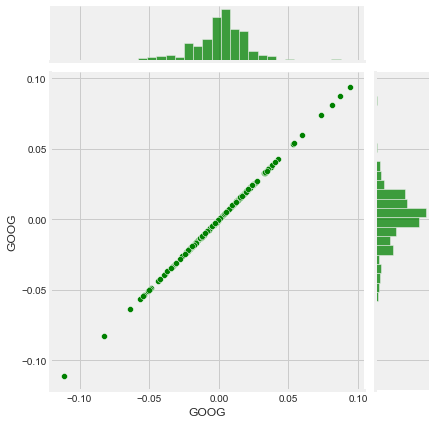

In [19]:
# We can compare the daily percentage return of two stocks to check how correlated.

sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='green')

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


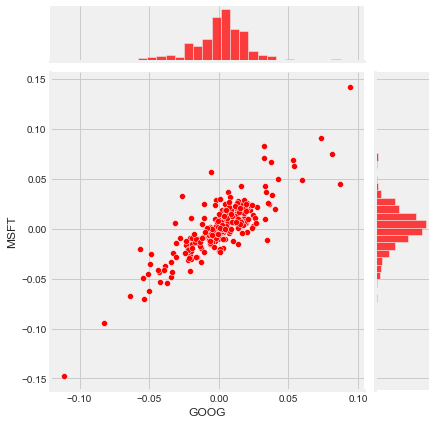

In [20]:
# use joinplot to compare the daily return of Google and Microsoft

sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter',color='red')

In [54]:
# now we can see that if two stocks are perfectly correlated with each other 
# a linear relationship between its daily return values should occur.


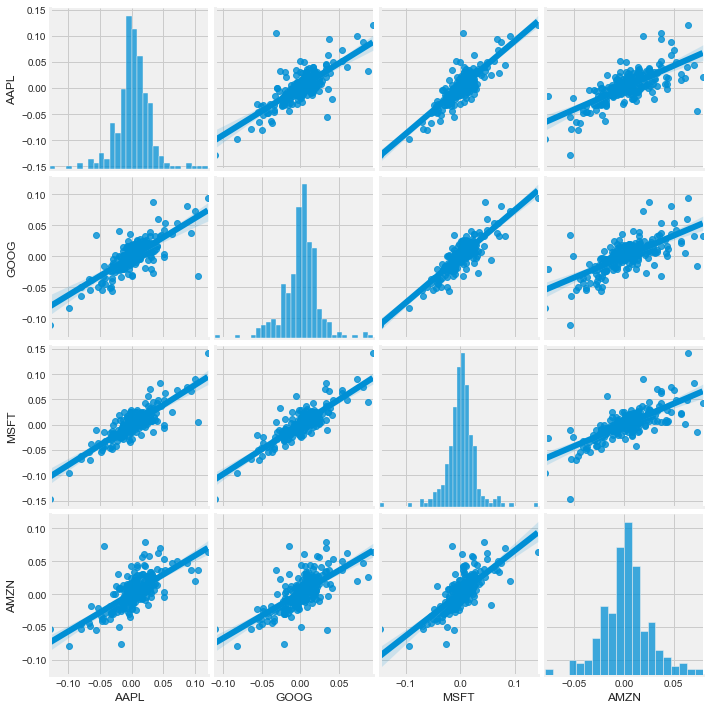

In [21]:
# we can use pairplot for an automatic visual analysis

sns.pairplot(tech_rets,kind='reg')

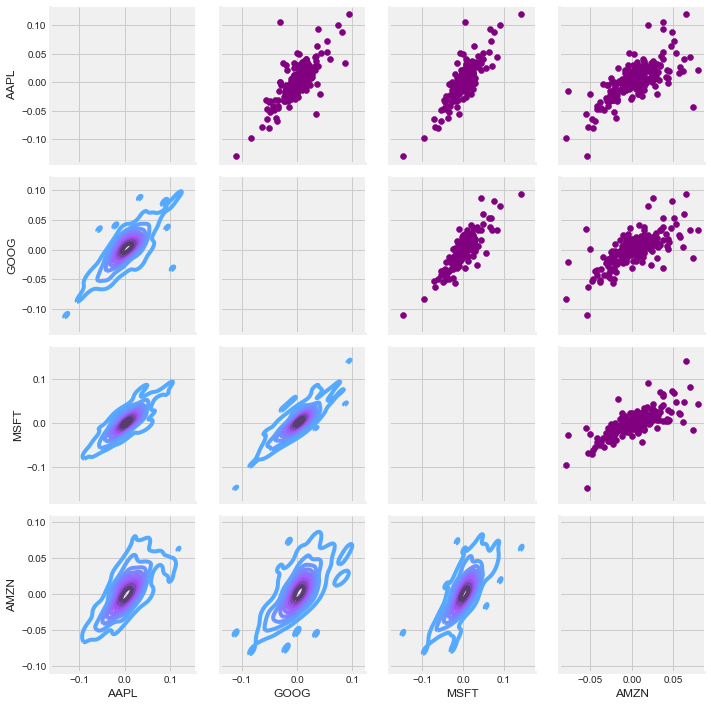

In [61]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


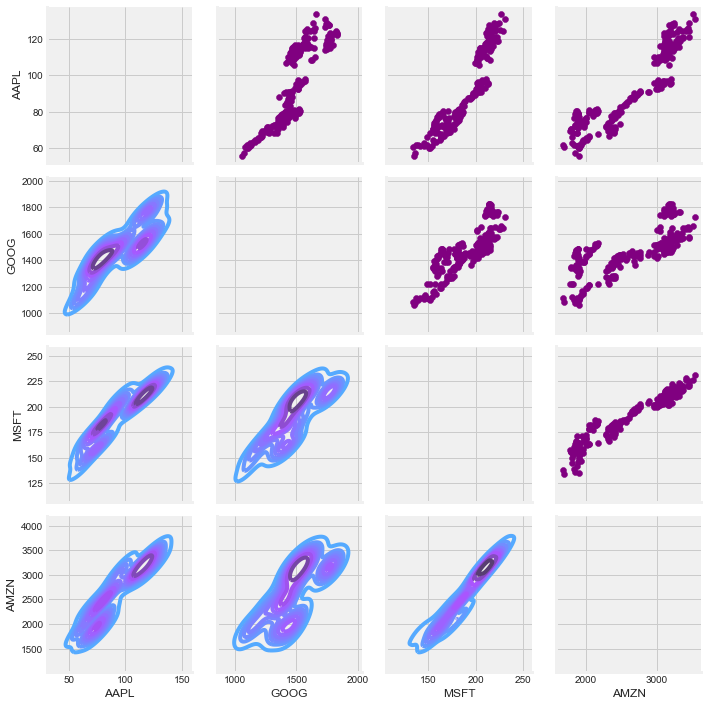

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

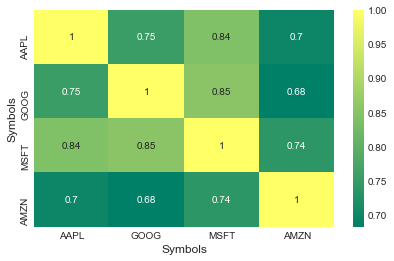

In [24]:
# Finally, we could also do a correlation plot, to get actual numerical values for the correlation bw
# stock's daily return values
# Let's go ahead and use seaborn for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

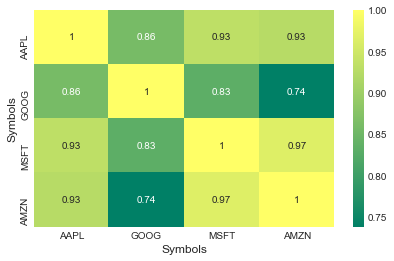

In [64]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [25]:
# We can see that MSFT and AMZN had the strongest correlation of daily stock return.

# 5. How much value do we put at risk by investing in a particular stocks?

# There are many way to qualify risk, one of the most basic ways using the information
# we've ghathered on daily percentage ruturns is by comparing the expected return with the std of the daily return



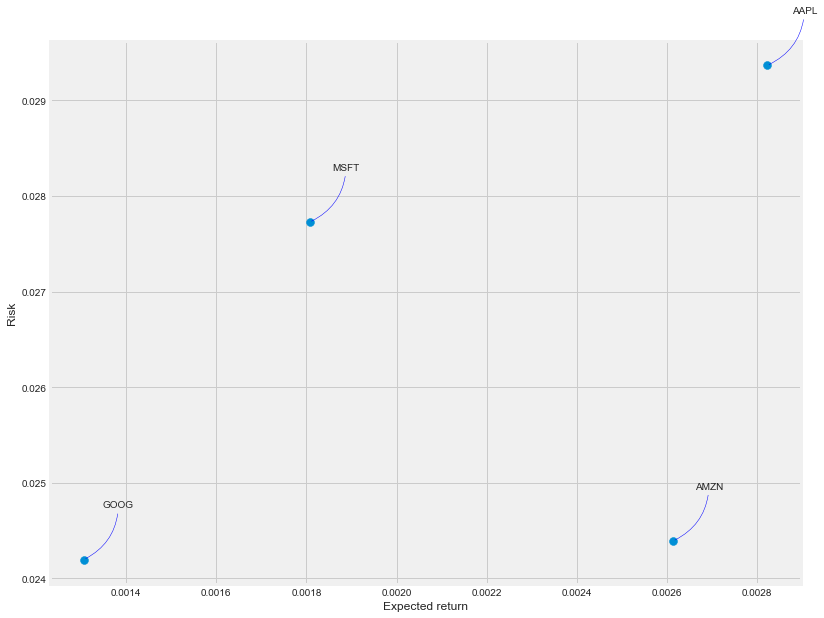

In [30]:
# let start by defining a new DataFrame as a cleaned version of the original tech_rets DataFrame

rets=tech_rets.dropna()
area=np.pi*20
plt.figure(figsize=(12,10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y), xytext=(50,50), textcoords='offset points',
                ha='right',va='bottom', 
                arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='arc3,rad=-0.3'))

In [31]:
# 6. Predicting the closing price stock price of APPLE inc:

# get the stock quote

df=DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

# show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.879997
2020-12-16,128.369995,126.559998,127.410004,127.809998,98208600.0,127.809998
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997


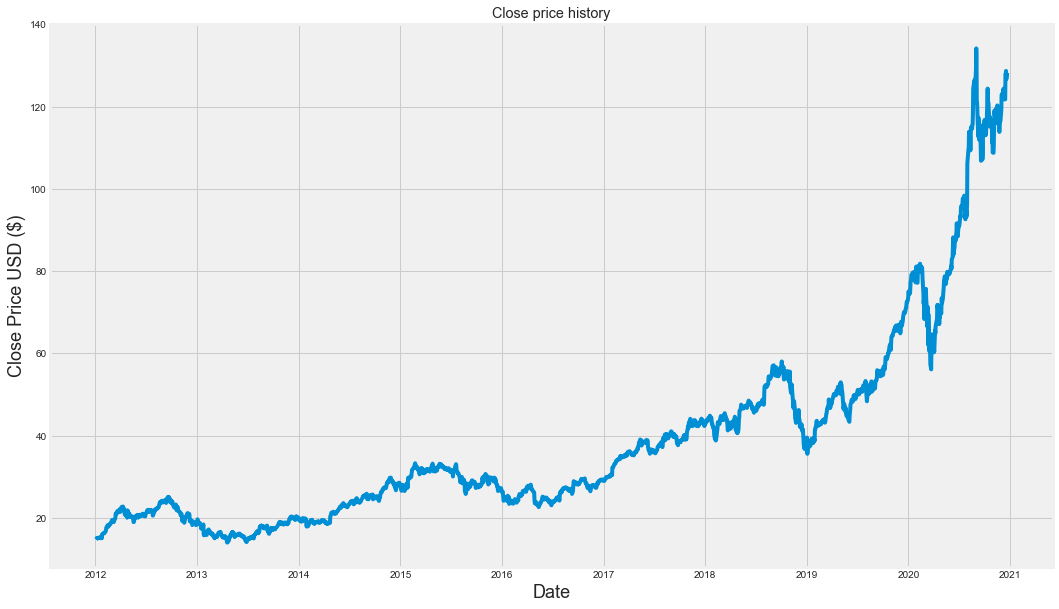

In [40]:
# plot 
plt.figure(figsize=(16,10))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.title('Close price history')
plt.show()

In [41]:
# create a new dataframe with only the Close colum

data=df.filter(['Close'])

# convert the dataframe to a numpy array
dataset=data.values
# get the number of rows to train the model

training_data_len=int(np.ceil(len(dataset)*.8))

training_data_len

1807

In [42]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.95442167],
       [0.9374546 ],
       [0.95051257]])

In [43]:
# Create the training data set
# Create the scaled training data set

train_data=scaled_data[0:int(training_data_len), :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model

model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)

1747/1747 [==============================] - 62s 35ms/step - loss: 3.2348e-04


In [46]:
# create the testing data set
# create a new array containing scaled values from index 1543 to 2002
test_data=scaled_data[training_data_len-60:,:]

# create the data set x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# convert the data to a numpy array

x_test=np.array(x_test)

# reshape the data

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

# get the models prediction prices values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)

rmse=np.sqrt(np.mean((predictions-y_test)**2))
rmse

6.244799003863571

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


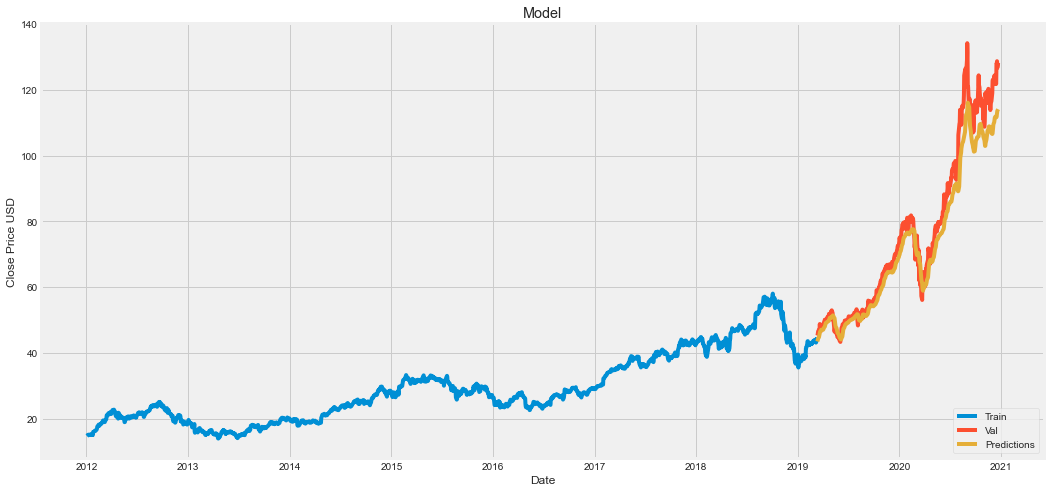

In [48]:
# plot the data 

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

# visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [49]:
valid

,Close,Predictions
Date,,
2019-03-12,45.227501,43.475422
2019-03-13,45.427502,43.699734
2019-03-14,45.932499,43.997478
2019-03-15,46.529999,44.359417
2019-03-18,47.005001,44.782082
...,...,...
2020-12-15,127.879997,111.659782
2020-12-16,127.809998,112.132225
2020-12-17,128.699997,112.803261
